# Correlation 
Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.



# Formula 



In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np

In [5]:
tickers = ['AAPL','TWTR', 'IBM','MSFT']
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,1,1)

data = pdr.get_data_yahoo(tickers,start,end)

In [6]:
data = data['Adj Close']

In [7]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2021-01-04,128.453445,54.529999,111.285995,215.434967
2021-01-05,130.041611,53.880001,113.261375,215.642776
2021-01-06,125.664223,53.259998,116.089775,210.051315
2021-01-07,129.952271,52.330002,115.820396,216.028732
2021-01-08,131.073914,51.480000,115.407372,217.344986


In [8]:
log_returns = np.log(data/data.shift())

In [9]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012288,-0.011992,0.017595,0.000964
2021-01-06,-0.034241,-0.011574,0.024666,-0.026271
2021-01-07,0.033554,-0.017616,-0.002323,0.028060
2021-01-08,0.008594,-0.016376,-0.003572,0.006074
...,...,...,...,...
2021-12-27,0.022715,0.003842,0.007550,0.022921
2021-12-28,-0.005784,-0.020511,0.007644,-0.003510
2021-12-29,0.000502,-0.015547,0.005414,0.002049


In [10]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT
Symbols,,,,
AAPL,1.000000,0.341945,0.050972,0.681066
TWTR,0.341945,1.000000,0.002483,0.334055
IBM,0.050972,0.002483,1.000000,0.004905
MSFT,0.681066,0.334055,0.004905,1.000000


In [13]:
sp500 = pdr.get_data_yahoo("^GSPC", start, end)

In [16]:
log_returns["SP500"] = np.log(sp500["Adj Close"]/sp500['Adj Close'].shift())

In [17]:
log_returns.head() 

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012288,-0.011992,0.017595,0.000964,0.007058
2021-01-06,-0.034241,-0.011574,0.024666,-0.026271,0.005694
2021-01-07,0.033554,-0.017616,-0.002323,0.028060,0.014738
2021-01-08,0.008594,-0.016376,-0.003572,0.006074,0.005477


In [18]:
 log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Symbols,,,,,
AAPL,1.000000,0.341945,0.050972,0.681066,0.681976
TWTR,0.341945,1.000000,0.002483,0.334055,0.426391
IBM,0.050972,0.002483,1.000000,0.004905,0.285589
MSFT,0.681066,0.334055,0.004905,1.000000,0.713807
SP500,0.681976,0.426391,0.285589,0.713807,1.000000


In [22]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker,start,end)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [23]:
test_correlation("LQD")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.341945,0.050972,0.681066,0.681976,0.261310
TWTR,0.341945,1.000000,0.002483,0.334055,0.426391,0.090447
IBM,0.050972,0.002483,1.000000,0.004905,0.285589,-0.042126
MSFT,0.681066,0.334055,0.004905,1.000000,0.713807,0.345653
SP500,0.681976,0.426391,0.285589,0.713807,1.000000,0.171881
LQD,0.261310,0.090447,-0.042126,0.345653,0.171881,1.000000


In [25]:
test_correlation("TLT")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.341945,0.050972,0.681066,0.681976,0.063609
TWTR,0.341945,1.000000,0.002483,0.334055,0.426391,-0.040963
IBM,0.050972,0.002483,1.000000,0.004905,0.285589,-0.185006
MSFT,0.681066,0.334055,0.004905,1.000000,0.713807,0.175115
SP500,0.681976,0.426391,0.285589,0.713807,1.000000,-0.140795
TLT,0.063609,-0.040963,-0.185006,0.175115,-0.140795,1.000000


In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [29]:
def visualize_correlation(ticker1,ticker2):
    df = pdr.get_data_yahoo([ticker1,ticker2],start,end)
    df = df["Adj Close"]
    df = df/df.iloc[0]
    fig,ax=plt.subplots()
    df.plot(ax=ax)

<IPython.core.display.Javascript object>


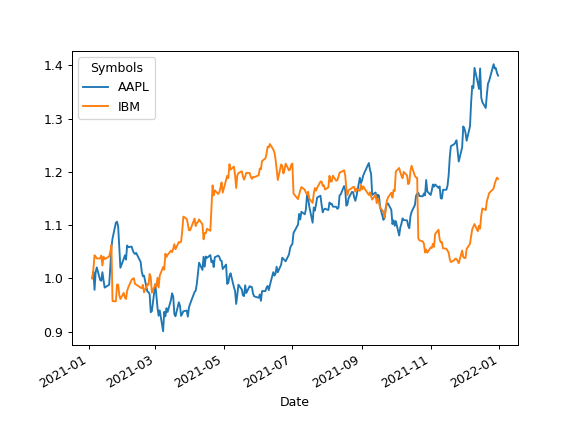

In [31]:
visualize_correlation("AAPL","IBM")

<IPython.core.display.Javascript object>


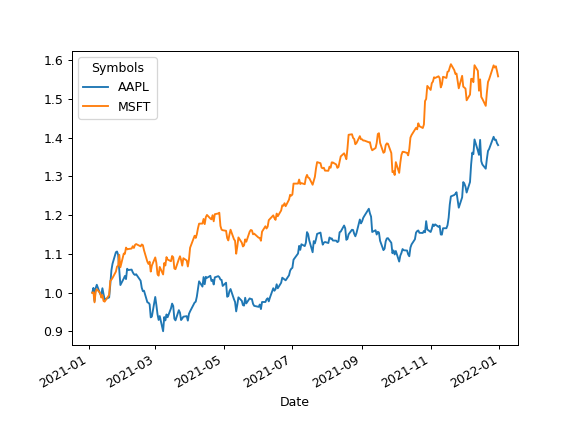

In [32]:
visualize_correlation('AAPL', 'MSFT')